# Init

In [1]:
from pyfiles import (
    complex as cplx,
    grid as grid,
    utils as utils,
    examples as ex,
    input as inp,
    plot as ourplot
)
from pyfiles.examples import CameraOpt

# so we don't have to reboot kernel every time we modify classes.py
%load_ext autoreload
%autoreload 2

import numpy as np
from typing import *
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline
import mars

def export_obj(ex: ex.Example, complex: cplx.complex, faces: List[np.ndarray]):
    out_name = ex.filename.replace('input', 'output')
    name = out_name.split('/')[-1]
    name = name.split('.')[0]
    filename = f'output/{name}-GB{ex.grid_buffer}-GS{ex.grid_size}-MA{ex.medial_axis}'
    if ex.prune_eps is not None:
        filename += f'-peps{ex.prune_eps}'
    filename += '.obj'

    with open(filename, 'w') as f:
        vi = 1
        f.write(f'o {name}\n')
        for triangle in complex.trilist:
            a = triangle.coords[0]
            b = triangle.coords[1]
            c = triangle.coords[2]
            f.write(f'v {a[0]} {a[1]} {a[2]}\n')
            f.write(f'v {b[0]} {b[1]} {b[2]}\n')
            f.write(f'v {c[0]} {c[1]} {c[2]}\n')
            f.write(f'f {vi + 0} {vi + 1} {vi + 2}\n')
            vi += 3

        f.write(f'o {name}-MA{ex.medial_axis}\n')
        for [a, b, c, d] in faces:
            f.write(f'v {a[0]} {a[1]} {a[2]}\n')
            f.write(f'v {b[0]} {b[1]} {b[2]}\n')
            f.write(f'v {c[0]} {c[1]} {c[2]}\n')
            f.write(f'v {d[0]} {d[1]} {d[2]}\n')
            f.write(f'f {vi + 0} {vi + 1} {vi + 2} {vi + 3}\n')
            vi += 4
    print(f'Wrote {filename}')

def plotline(ax, p, q, *args, **kwargs):
    ax.plot([p[0], q[0]], [p[1], q[1]], [p[2], q[2]], *args, **kwargs)


# input

In [2]:
# example = ex.theta

# our_complex = inp.read_obj(example.filename)
# gridd = grid.Grid3.from_complex(our_complex, example.grid_size, buffer=example.grid_buffer)

# rs_complex = mars.read_from_obj(example.filename)

# list_of_swaps = []
# '''A list of swaps of the form `(old-cell, new-cell, [swaps])`'''

# rs_states = {}
# '''States for each point.  Used to live in the python Grid3'''

# n_edges = gridd.number_of_grid_edges()
# visit_count = 0
# def visit(new_cell: Tuple[int,int,int], old_cell: Tuple[int,int,int]):
#   global visit_count
#   visit_count += 1
#   perf = visit_count / n_edges * 100
#   print(f'visiting {visit_count}/{n_edges} ({perf:.1f}%)\r', end='')
#   if old_cell is None:
#     center_point = gridd.coordinate(new_cell)
#     with utils.Timed('rs reduce'):
#       rs_states[new_cell] = mars.reduce_from_scratch(rs_complex, list(center_point))
#   else:
#     new_point = gridd.coordinate(new_cell)
#     with utils.Timed('rs reduce_vine'):
#       rs_old_state = rs_states[old_cell]
#       (rs_new_state, swaps) = mars.vineyards_123(rs_complex, rs_old_state, list(new_point))
#       list_of_swaps.append((old_cell, new_cell, swaps))
#       rs_states[new_cell] = rs_new_state

# with utils.Timed('flood_fill_visit'):
#   gridd.flood_fill_visit((0, 0, 0), visit)
# utils.Timed.report()



In [3]:
example = ex.ellipse_a_b
rs_complex = mars.read_from_obj(example.filename)
our_complex = inp.read_obj(example.filename)
rgrid = mars.Grid.around_complex(rs_complex, example.grid_size, example.grid_buffer)
with utils.Timed('all rust'):
  res = rgrid.run_state(1000, rs_complex, True)
utils.Timed.report()

Reduce around 13 states from scratch ...
pop grid volume 13020
pop grid volume 6720
pop grid volume 6510
pop grid volume 3520
pop grid volume 3360
pop grid volume 3410
pop grid volume 3255
pop grid volume 1870
pop grid volume 1760
pop grid volume 1785
pop grid volume 1680
pop grid volume 1760
pop grid volume 1760
pop grid volume 1680
pop grid volume 1680
pop grid volume 1020
pop grid volume 935
Reduce dim0 ... done
Reduce dim1 ... done
Reduce dim2 ... done
Invert V0 ... done
Invert V1 ... done
Invert V2 ... done
pop grid volume 960
Reduce dim0 ... done
Reduce dim1 ... done
Reduce dim2 ... done
Invert V0 ... done
Invert V1 ... done
Invert V2 ... done
pop grid volume 880
Reduce dim0 ... done
Reduce dim1 ... done
Reduce dim2 ... done
Invert V0 ... done
Invert V1 ... done
Invert V2 ... done
pop grid volume 935
Reduce dim0 ... done
Reduce dim1 ... done
Reduce dim2 ... done
Invert V0 ... done
Invert V1 ... done
Invert V2 ... done
pop grid volume 935
Reduce dim0 ... done
Reduce dim1 ... done


Run vineyards in grids: 1.580727417s


# chop chop

Found 160 faces
Wrote output/ellipse_a2_b3-GB0.1-GS0.1-MA0.obj
(31, 20, 1)
({(12, 14, 0): <builtins.Reduction object at 0x2a3d13e00>, (6, 38, 4): <builtins.Reduction object at 0x2a3cb8c00>, (51, 1, 3): <builtins.Reduction object at 0x2a3cb0000>, (49, 8, 4): <builtins.Reduction object at 0x2a3bc0800>, (41, 26, 2): <builtins.Reduction object at 0x2a3b33400>, (26, 17, 2): <builtins.Reduction object at 0x29fa4d600>, (15, 25, 4): <builtins.Reduction object at 0x29fd0b200>, (29, 32, 3): <builtins.Reduction object at 0x17a327800>, (54, 4, 1): <builtins.Reduction object at 0x17a3cb800>, (62, 31, 1): <builtins.Reduction object at 0x17a3a6e00>, (58, 5, 2): <builtins.Reduction object at 0x17a31ae00>, (9, 38, 3): <builtins.Reduction object at 0x2f82cfa00>, (22, 36, 2): <builtins.Reduction object at 0x2f83a5c00>, (0, 24, 1): <builtins.Reduction object at 0x2f83fd600>, (4, 42, 3): <builtins.Reduction object at 0x2f81e7600>, (3, 33, 0): <builtins.Reduction object at 0x2fb33a000>, (47, 22, 1): <builti

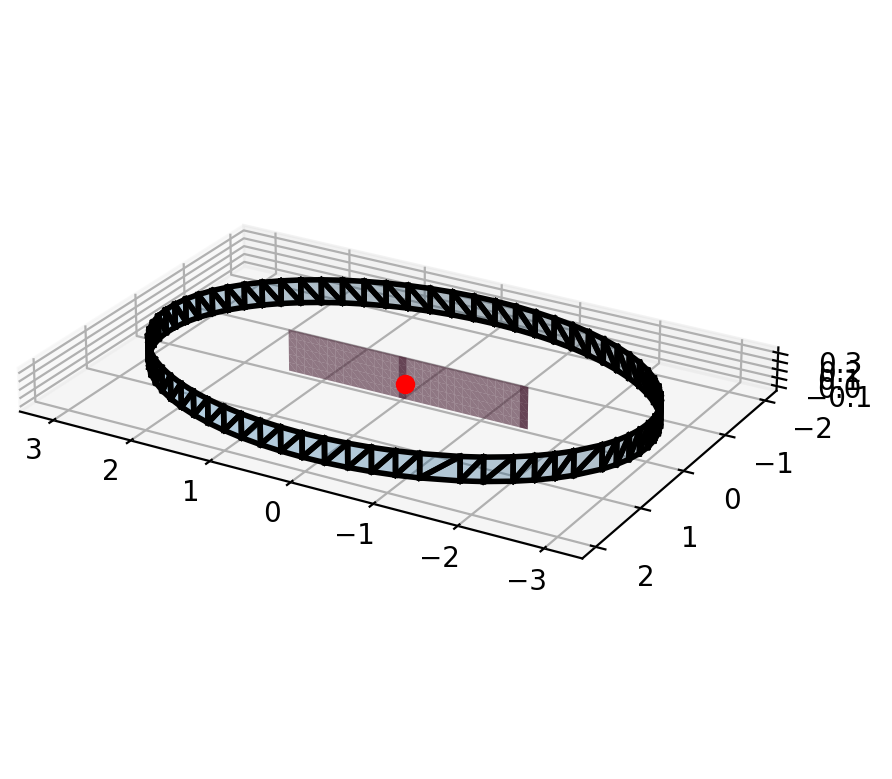

In [4]:
# CONTROL PARAMETERS
medaxdim = 0  # can say example.medial_axis when set

# euclidean prune: all dims
euclid_prune = True
prune_dist = 0.6

# coboundary: dim 0,2
cofaceprune = True

# faceprune: dim 1,2
faceprune = False

# persistence prune: dim 1
persprune = False
persistence_threshold = 0.01

###########################################

faces = []
rs_states, swaps_ = res

json_swaps = []

for old_cell, new_cell, swaps in swaps_:
    state_old = rs_states[old_cell]
    state_new = rs_states[new_cell]
    swaps = swaps.pyclone()

    # PRUNING
    # coboundary: mainly for dim 0,2
    if cofaceprune:
        swaps.prune_coboundary(rs_complex)
    if faceprune:
        swaps.prune_common_face(rs_complex)

    # persistence: mainly for dim 1
    if persprune:
        swaps.prune_persistence(rs_complex, state_old, state_new, persistence_threshold)

    # euclidean prune: for all dims
    # NOTE: dist prune is NOT grid size based, it is absolute dist
    # if example.prune_dist is not None:
    #   swaps.prune_euclidian(rs_complex, example.prune_dist**2)
    if euclid_prune:
        swaps.prune_euclidian(rs_complex, prune_dist**2)
    # END PRUNING

    # CHOOSE MEDIAL AXIS HERE (`example.medial_axis`):
    swaps = list(filter(lambda t: t.dim == medaxdim, swaps.v))

    if 0 < len(swaps):
        json_swaps.append((list(old_cell), list(new_cell), mars.Swaps(swaps)))
        faces.append(
            list(map(np.array, rgrid.dual_face(list(old_cell), list(new_cell))))
        )

print(f"Found {len(faces)} faces")
export_obj(example, our_complex, faces)
plot, ax = ourplot.plot_vineyard_results(
    our_complex,
    grid.Grid3.from_complex(our_complex, example.grid_size, buffer=example.grid_buffer),
    faces,
    CameraOpt(azim=120, elev=25),
    # only_edges=True,
    # complex_vertices=True,
    skip_grid=True,
    # skip_cube=True
)


cell = tuple(rgrid.closest_index_of([-0.15, 0.2, 0]))
# [0.03, 0.2, 0] with +/- 0.03 gives 1,13 swap in figure 8
cell = tuple(rgrid.closest_index_of([0, -0.05, 0]))

# cell = tuple(np.array(rgrid.shape) // 2)
print(cell)
state = rs_states[cell]
grid_pos = rgrid.coordinate(list(cell))
ax.plot([grid_pos[0]], [grid_pos[1]], [grid_pos[2]], "ro")



print(res)
print(swaps_)
# Output interesting data to this json file
with open('json.json', 'w') as f:
    f.write(
        mars.json_output(rs_complex, state, rgrid, json_swaps)
    )

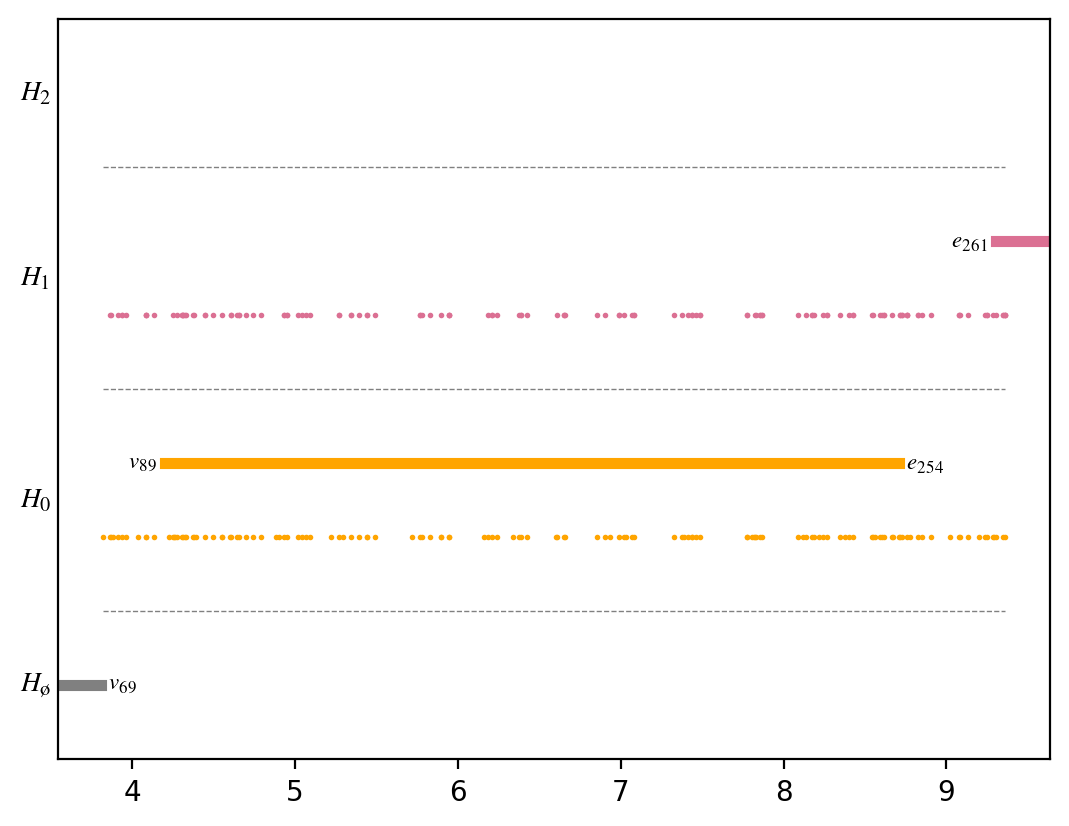

In [5]:
barcode = state.barcode(rs_complex, 0)
barcodes = {dim: state.barcode(rs_complex, dim) for dim in range(-1, 3)}
earliest_birth = min(
  t.birth[0] for dim in range(-1, 3) for t in barcodes[dim]  if t.birth is not None
)
latest_death = max(
  t.death[0] for dim in range(-1, 3) for t in barcodes[dim]  if t.death is not None
)
span = latest_death - earliest_birth

padding = 0.05
xmin = earliest_birth - span * padding
xmax = latest_death + span * padding

fig, ax = plt.subplots()
fig.set_dpi(200)
ax.set_xlim(xmin, xmax)
ax.set_yticks([])
matplotlib.rc("font", **{"family": "serif", "serif": ["Times"]})
matplotlib.rc("text", usetex=True)

dim2label = {-1: 'ø', 0: 'v', 1: 'e', 2: 't'}
dim2color = {
  -1: 'gray',
  0: 'orange',
  1: 'palevioletred',
  2: 'cornflowerblue'
}

label_padding = 0.05
y = 0
for dim in range(-1, 3):
  color = dim2color[dim]
  barcode = barcodes[dim]
  if 0 <= dim:
    ax.plot([earliest_birth, latest_death], [y, y], color='gray', linestyle='--', linewidth=0.5)
  first_y = y
  if 0 <= dim:
    y += 1
    pt_y = y
  y += 1
  for bar in barcode:

    if bar.birth is None:
      q = bar.death[0]
      ax.plot([xmin, q], [y,y], color=color, linewidth=4)
      ax.text(q + label_padding, y, f'${dim2label[dim + 1]}_{{{bar.death[1]}}}$', size='small', horizontalalignment='left', verticalalignment='center')
    elif bar.death is None:
      p = bar.birth[0]
      ax.plot([p, xmax], [y,y], color=color, linewidth=4)
      ax.text(p - label_padding, y, f'${dim2label[dim]}_{{{bar.birth[1]}}}$', size='small', horizontalalignment='right', verticalalignment='center')
    elif bar.birth[0] == bar.death[0]:
      p = bar.birth[0]
      ax.plot(p, pt_y, 'o', markersize=1, color=color)
      y -= 1
    else:
      p = bar.birth[0]
      q = bar.death[0]
      ax.plot([p, q], [y, y], color=color, linewidth=4)
      ax.text(p - label_padding, y, f'${dim2label[dim]}_{{{bar.birth[1]}}}$', size='small', horizontalalignment='right', verticalalignment='center')
      ax.text(q + label_padding, y, f'${dim2label[dim+1]}_{{{bar.death[1]}}}$', size='small', horizontalalignment='left', verticalalignment='center')
    y += 1
  ax.text(xmin -0.05, (first_y + y) / 2, f'$H_{{{dim if dim >= 0 else "ø"}}}$', horizontalalignment='right', verticalalignment='center')
ax.set_ylim(0, y);